## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
merge_df=pd.merge(study_results, mouse_metadata, on ="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [4]:
# Checking the number of mice.
Number_of_Mice = len(merge_df["Mouse ID"].unique())
Number_of_Mice

249

In [5]:
# merge_df.columns

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

duplicate = merge_df[merge_df.duplicated(["Mouse ID","Timepoint"],keep=False)]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# duplicate.count()

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [9]:
Clean_DataFrame = merge_df[merge_df["Mouse ID"] != "g989"]
Clean_DataFrame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
# Checking the number of mice in the clean DataFrame.
Clean_Number_of_Mice = len(Clean_DataFrame["Mouse ID"].unique())
Clean_Number_of_Mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [12]:
Group_by_DrugRegimen = Clean_DataFrame.groupby(["Drug Regimen"])
TumorVolumeMean=Group_by_DrugRegimen[["Tumor Volume (mm3)"]].mean()
# TumorVolumeMean

In [13]:
TumorVolumeMedian=Group_by_DrugRegimen[["Tumor Volume (mm3)"]].median()
# TumorVolumeMedian

In [14]:
TumorVolumeVariance=Group_by_DrugRegimen[["Tumor Volume (mm3)"]].var()
# TumorVolumeVariance

In [15]:
TumorVolumeSEM=Group_by_DrugRegimen[["Tumor Volume (mm3)"]].sem()
# TumorVolumeSEM

In [16]:
TumorVolumeSTD=Group_by_DrugRegimen[["Tumor Volume (mm3)"]].std()
# TumorVolumeSTD

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table1=pd.merge(TumorVolumeMean, TumorVolumeMedian, on ="Drug Regimen", how="outer")

summary_table1=summary_table1.rename(
    columns={
        "Tumor Volume (mm3)_x": "Tumor Volume Mean",
        "Tumor Volume (mm3)_y": "Tumor Volume Median"
    })

summary_table1["Tumor Volume Variance"]=TumorVolumeVariance
summary_table1["Tumor Volume Std. Dev."]=TumorVolumeSTD
summary_table1["Tumor Volume SEM"]=TumorVolumeSEM

summary_table1

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Using the aggregation method, produce the same summary statistics in a single line

summary_table2= Clean_DataFrame.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]})
summary_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_of_timepoints=Clean_DataFrame['Drug Regimen'].value_counts()
number_of_timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

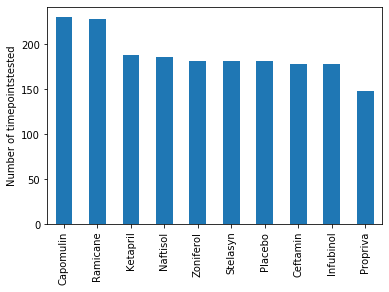

In [20]:
# Create the first bar plot by using Pandas's DataFrame.plot() method.
number_of_timepoints.plot(kind="bar")
plt.ylabel("Number of timepointstested")
plt.show()

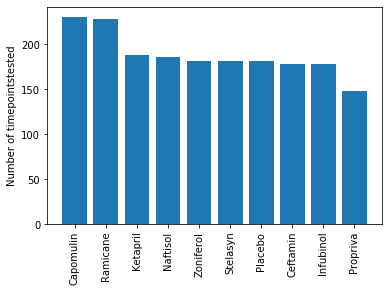

In [21]:
# Create the second bar plot by using Matplotlib's pyplot methods.

x=number_of_timepoints.index.values
y=number_of_timepoints.values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel("Number of timepointstested")
plt.show()

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Clean_Mouse_DataFrame = mouse_metadata[mouse_metadata["Mouse ID"] != "g989"]
Clean_Mouse_DataFrame
Mouse_Sex=Clean_Mouse_DataFrame['Sex'].value_counts()
Mouse_Sex

Male      125
Female    123
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

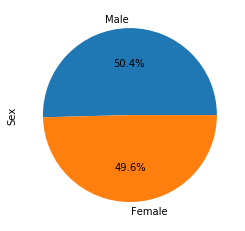

In [23]:
Mouse_Sex.plot(kind="pie",autopct="%1.1f%%")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

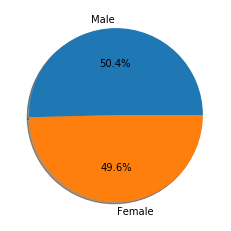

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Mouse_Sex.values, labels=Mouse_Sex.index.values,autopct="%1.1f%%", shadow=True, startangle=0)
plt.show

## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Max=Clean_DataFrame.groupby(["Mouse ID"])['Timepoint'].max()
Max=Max.reset_index()
Max

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Max_merged= Max.merge(Clean_DataFrame,on=['Mouse ID','Timepoint'],how="left")
Max_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments_List=['Capomulin', 'Ramicane', 'Infubinol' , 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Volume=[]

In [127]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

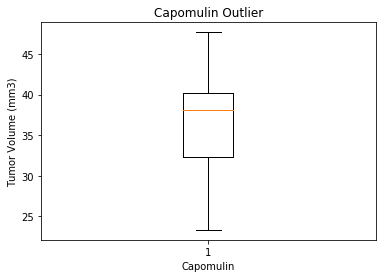

In [128]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Capomulin_outlier=Max_merged.loc[Max_merged["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Outlier')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Capomulin')
ax1.boxplot(Capomulin_outlier)
plt.show()

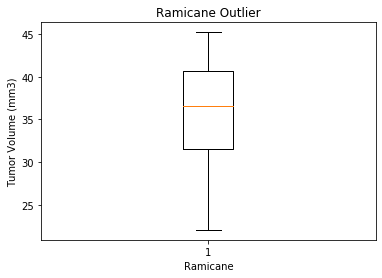

In [129]:
Ramicane_outlier=Max_merged.loc[Max_merged["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Outlier')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Ramicane')
ax1.boxplot(Ramicane_outlier)
plt.show()

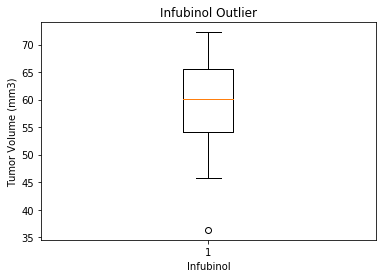

In [130]:
Infubinol_outlier=Max_merged.loc[Max_merged["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Outlier')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Infubinol')
ax1.boxplot(Infubinol_outlier)
plt.show()

In [131]:
quartiles = Max_merged.loc[Max_merged["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = Max_merged.loc[Max_merged["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"].loc[(Max_merged.loc[Max_merged["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"] < lower_bound) | (Max_merged.loc[Max_merged["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"] > upper_bound)]

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"The potential outliers could be {outliers} ")

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The potential outliers could be 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 


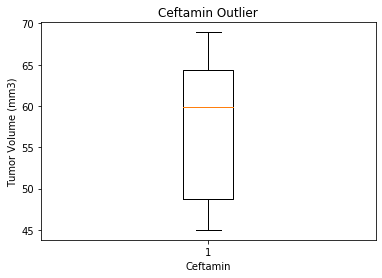

In [132]:
Ceftamin_outlier=Max_merged.loc[Max_merged["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Outlier')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Ceftamin')
ax1.boxplot(Ceftamin_outlier)
plt.show()

## Line and Scatter Plots

In [133]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin = Clean_DataFrame.loc[Clean_DataFrame['Drug Regimen'] == "Capomulin"]
Capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [134]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

mouse_m601= Capomulin.loc[Capomulin['Mouse ID']== 'm601']
mouse_m601

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17
1887,m601,20,34.255732,1,Capomulin,Male,22,17
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


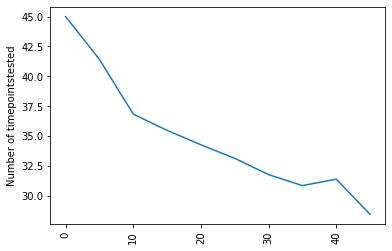

In [135]:
x=mouse_m601['Timepoint']
y=mouse_m601['Tumor Volume (mm3)']
plt.plot(x,y)
plt.xticks(rotation=90)
plt.ylabel("Number of timepointstested")
plt.show()

In [136]:
Capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


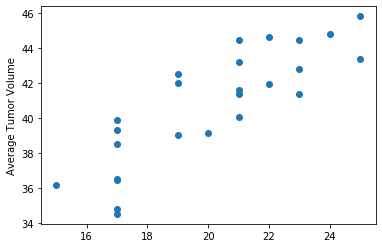

In [137]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Weight_Group=Capomulin.groupby("Mouse ID")
Weight_Group_table=Weight_Group[["Tumor Volume (mm3)", "Weight (g)"]].mean()

Weight_Group_table

x=Weight_Group_table['Weight (g)']
y=Weight_Group_table['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.xlabel=('Weight (g)')
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

In [138]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomul
correlation=round(st.pearsonr(Weight_Group_table['Weight (g)'],Weight_Group_table['Tumor Volume (mm3)'])[0],2)
correlation

0.84

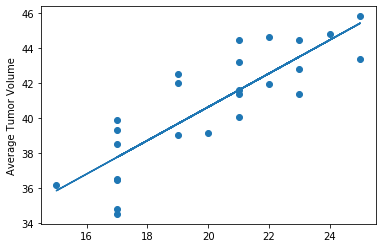

In [139]:
# Plot the linear regression model on top of the previous scatter plot.

Weight_Group=Capomulin.groupby("Mouse ID")
Weight_Group_table=Weight_Group[["Tumor Volume (mm3)", "Weight (g)"]].mean()

Weight_Group_table

x=Weight_Group_table['Weight (g)']
y=Weight_Group_table['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.xlabel=('Weight (g)')
plt.ylabel("Average Tumor Volume")

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept)

plt.show()